# KMeans Clustering 
Using the Senate Votes dataset  perform k-means clustering with k = 2 and show that you can learn (most of) the Senators’ parties in a completely unsupervised manner. Which Senators did your algorithm make a mistake on?

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans


Read Data from a public repo for the senatior data in csv format and
Politician labels are stored in the text file

In [2]:
url_votes = 'https://raw.githubusercontent.com/exemplary-citizen/PCA-and-Senate-Voting-Data/master/senator_pca_problem/senator_data_pca/'
senator_df =  pd.read_csv(url_votes + 'data_matrix.csv',error_bad_lines=False)
af = pd.read_csv(url_votes + 'politician_labels.txt', header=None)
af["affiliations"] = af[0].str.split().str[-1]
print(af)


                0 affiliations
0     Specter Red          Red
1      Obama Blue         Blue
2   Mikulski Blue         Blue
3      Boxer Blue         Blue
4     Nelson Blue         Blue
..            ...          ...
95    Harkin Blue         Blue
96   Johnson Blue         Blue
97       Lott Red          Red
98     Allard Red          Red
99      Frist Red          Red

[100 rows x 2 columns]


Generate the senator data as a numpy array 

In [3]:
X = np.array(senator_df.values[:, 3:].T, dtype='float64') 
# print(X.shape)
typical_row = X[0,:]
print(typical_row.shape)
# print(typical_row)

affiliations = af["affiliations"]
print(affiliations)


(542,)
0      Red
1     Blue
2     Blue
3     Blue
4     Blue
      ... 
95    Blue
96    Blue
97     Red
98     Red
99     Red
Name: affiliations, Length: 100, dtype: object


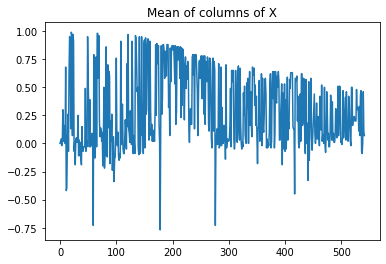

(100, 542)


In [4]:
X_mean = np.mean(X, axis = 0)
plt.plot(X_mean)
plt.title('Mean of columns of X')
plt.show()

X_original = X.copy()
X = X - np.mean(X, axis = 0)
print(X.shape)



Create the KMeans Model and fit and transform the data and display the variation in the affiliations 

In [5]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(X)

#get clustering labels from model 
labels = kmeans_model.labels_

#compare model with original data
# display(pd.crosstab(labels,affiliations))
print(pd.crosstab(labels, affiliations)) 

# compute error
err = np.mean(affiliations != labels)
print(f"{err*100}%")


affiliations  Blue  Red  Yellow
row_0                          
0               42    1       2
1                1   54       0
100.0%


Find out the Anomalies in the prediction by Kmeans 

In [6]:
republican_oddballs = af[(labels == 0) & (affiliations == "Red")] #Red
# print(republican_oddballs)
democrat_oddballs = af[(labels == 1) & (affiliations == "Blue")] #Blue
# print(democrat_oddballs)
oddballs = af[(labels == 0) & (affiliations == "Yellow")]
# print(oddballs)

aff = affiliations.replace("Red",1).replace("Blue",0)

print('The misclassified senators were:')
print(af[aff != labels])


The misclassified senators were:
                  0 affiliations
21      Nelson Blue         Blue
34  Jeffords Yellow       Yellow
58       Chafee Red          Red
62    Dayton Yellow       Yellow


Visualise the actualData and the predicted Kmeans data 

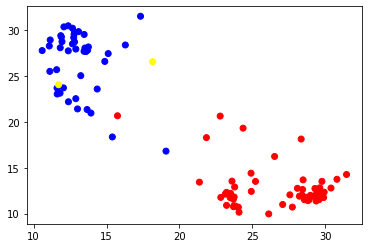

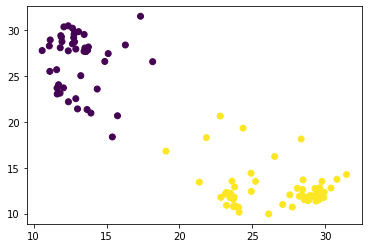

In [8]:
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=affiliations)
plt.show()

plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels)
plt.show()


Modify the initial Affilications data to match the Labels output from the Kmeans

In [0]:
# print(affiliations)
affiliations1=af["affiliations"]
affiliations1=affiliations1.replace('Red',1)
affiliations1=affiliations1.replace('Blue',0)


Find the Polititions who tend to vote for the other party 

In [10]:
a = affiliations[(affiliations1 != labels )& (affiliations1 !="Yellow")]
# print(a)

print(af[0][a.index])


21    Nelson Blue
58     Chafee Red
Name: 0, dtype: object


We can ignore the candidates with yellow affiliations Hence out error percentage is 2%. Other than
that senators Nelson (democrat) and Chafee (republican), voted with the other party enough times,
to have the k-Means algorithm include them in the cluster for the opposite side.  
Nelson is the Democrat but votes for Republican    
Chafee is a Republican but votes for Democrat




Reference 
https://www.dataquest.io/blog/k-means-clustering-us-senators/